In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
data=pd.read_csv(r"C:\Users\Srividya\Downloads\airplane-passengers.csv")
data.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
data.shape

(144, 2)

In [5]:
data.describe()

,Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Month       144 non-null    object
 1   Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


<Axes: >

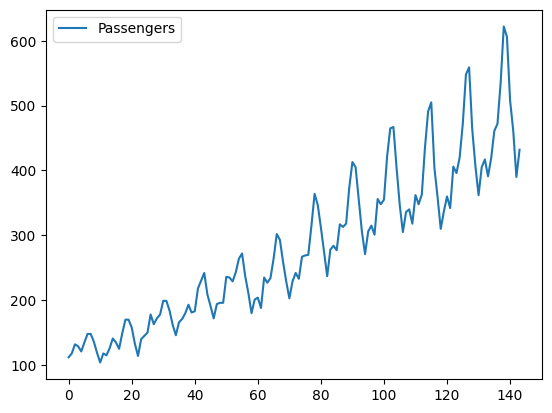

In [7]:
data.plot()

In [8]:
data.isna().sum()

Month         0
Passengers    0
dtype: int64

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose

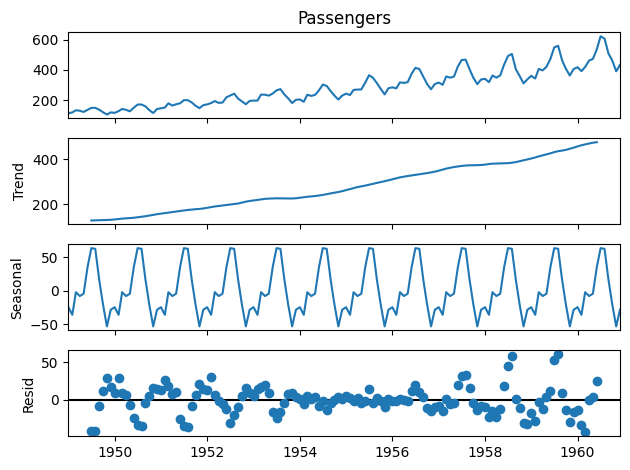

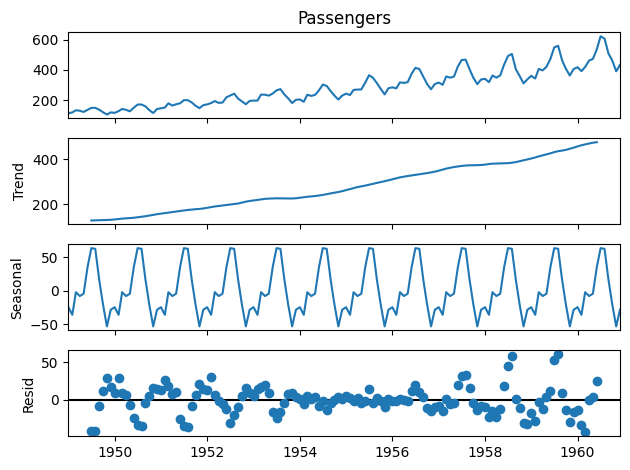

In [10]:
# Convert Month to datetime and set as index
data['Month'] = pd.to_datetime(data['Month'])
data.set_index('Month', inplace=True)

# Ensure monthly frequency
data = data.asfreq('MS')

# Decompose
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data['Passengers'], model='additive', period=12)
result.plot()


In [11]:
data.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Freq: MS
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


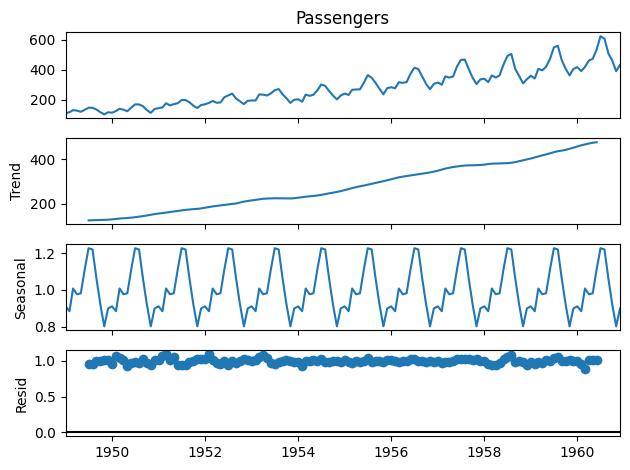

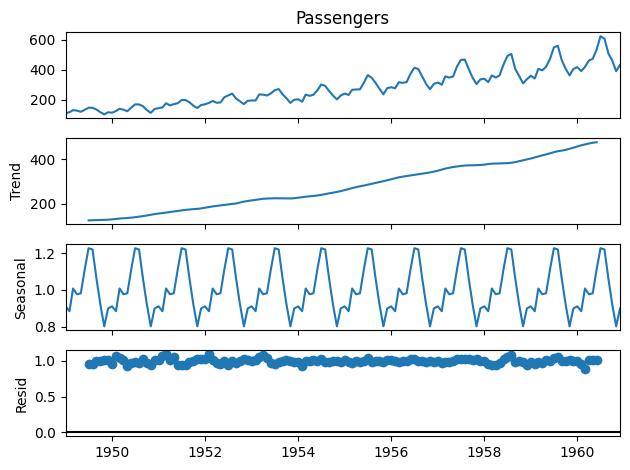

In [13]:
result = seasonal_decompose(data['Passengers'], model='multiplicative')
result.plot()


In [14]:
#checking for stationarity
from statsmodels.tsa.stattools import adfuller
#define function for ADF test
result=adfuller(data["Passengers"])
result

(0.8153688792060463,
 0.991880243437641,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [15]:
# Defining a function to use ADF test

def adfuller_test(sales):
    result = adfuller(sales)
    labels = ['ADF Test Statistic', 'p-values', '#Lags Used', 'Number of observations used']
    for value, label in zip(result, labels):
        print(label + ' : ' + str(value))
    if result[1] <= 0.05:
        print("The data is stationary")
    else:
        print("The data is not stationary")

adfuller_test(data['Passengers'])



ADF Test Statistic : 0.8153688792060463
p-values : 0.991880243437641
#Lags Used : 13
Number of observations used : 130
The data is not stationary


In [16]:
help(data.diff)

Help on method diff in module pandas.core.frame:

diff(periods: 'int' = 1, axis: 'Axis' = 0) -> 'DataFrame' method of pandas.core.frame.DataFrame instance
    First discrete difference of element.
    
    Calculates the difference of a DataFrame element compared with another
    element in the DataFrame (default is element in previous row).
    
    Parameters
    ----------
    periods : int, default 1
        Periods to shift for calculating difference, accepts negative
        values.
    axis : {0 or 'index', 1 or 'columns'}, default 0
        Take difference over rows (0) or columns (1).
    
    Returns
    -------
    DataFrame
        First differences of the Series.
    
    See Also
    --------
    DataFrame.pct_change: Percent change over given number of periods.
    DataFrame.shift: Shift index by desired number of periods with an
        optional time freq.
    Series.diff: First discrete difference of object.
    
    Notes
    -----
    For boolean dtypes, this uses :m

In [17]:
airline_diff = data.diff(periods=1)
airline_diff.head()

,Passengers
Month,
1949-01-01,NaN
1949-02-01,6.0
1949-03-01,14.0
1949-04-01,-3.0
1949-05-01,-8.0


In [18]:
adfuller_test(airline_diff['Passengers'].dropna())

ADF Test Statistic : -2.8292668241699923
p-values : 0.054213290283826474
#Lags Used : 12
Number of observations used : 130
The data is not stationary


<Axes: xlabel='Month'>

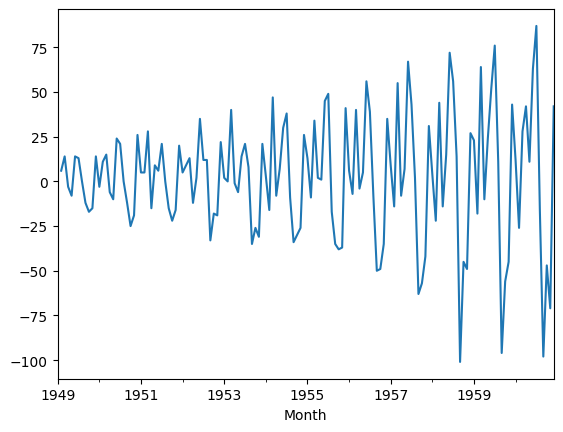

In [19]:
airline_diff['Passengers'].plot()


p value is still higher and not stationary mean is constant and variance is not constant so do second order differentiation

In [20]:
# another order of differencing
airline_diff2 = airline_diff.diff(periods=1)
airline_diff2.head()


,Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,8.0
1949-04-01,-17.0
1949-05-01,-5.0


In [21]:
adfuller_test(airline_diff2['Passengers'].dropna())

ADF Test Statistic : -16.384231542468516
p-values : 2.7328918500141235e-29
#Lags Used : 11
Number of observations used : 130
The data is stationary


In [22]:
df = pd.DataFrame({'a':[1, 2, 3, 4, 5, 6],
                       'b':[1, 2, 3, 5, 8,9],
                       'c':[1, 4, 9, 16, 25, 36]})   #examples

In [23]:
df.diff()

,a,b,c
0,NaN,NaN,NaN
1,1.0,1.0,3.0
2,1.0,1.0,5.0
3,1.0,2.0,7.0
4,1.0,3.0,9.0
5,1.0,1.0,11.0


In [24]:
df.diff(axis=1)

,a,b,c
0,NaN,0,0
1,NaN,0,2
2,NaN,0,6
3,NaN,1,11
4,NaN,3,17
5,NaN,3,27


do regular differencing that is value of d and then check adf for stationarity check.if data is stationary then only we can build time series models

<Axes: xlabel='Month'>

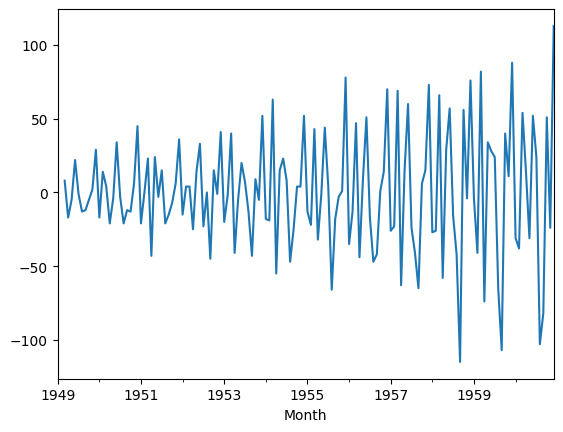

In [25]:
airline_diff2['Passengers'].plot()

now mean and variance is constant on both positive and negative sides.data is stationary now lets build MA model .

In [26]:
#find acf and pacf plot to find q and p value .here we build ma model so we find q value
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

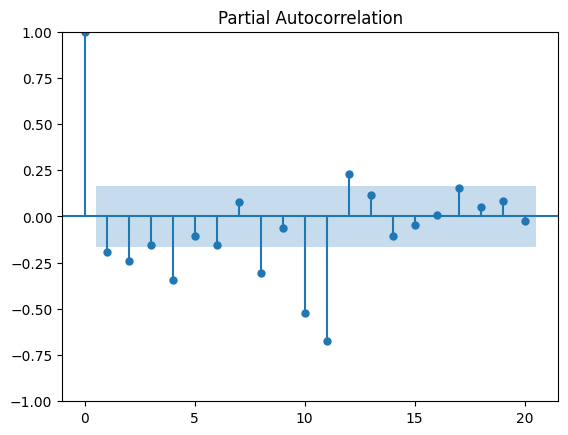

In [27]:
plot_pacf(airline_diff2['Passengers'].dropna(),lags=20)
plt.show()

so we take p value as 2 

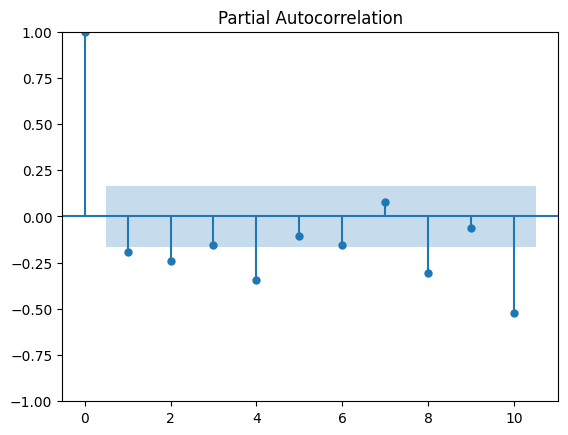

In [28]:
#now q value can be taken as 2 for ARIMA model s order 
plot_pacf(airline_diff2['Passengers'].dropna(),lags=10)
plt.show()

In [33]:
#model building
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(data['Passengers'], order=(2,2,0))
model_fit = model.fit()

print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                  144
Model:                 ARIMA(2, 2, 0)   Log Likelihood                -717.039
Date:                Tue, 09 Dec 2025   AIC                           1440.078
Time:                        01:19:22   BIC                           1448.945
Sample:                    01-01-1949   HQIC                          1443.681
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2494      0.087     -2.871      0.004      -0.420      -0.079
ar.L2         -0.2527      0.102     -2.472      0.013      -0.453      -0.052
sigma2      1422.2693    142.330      9.993      0.0

In [30]:
forecast = model_fit.forecast(steps=12)   # next 12 months
print(forecast)


1961-01-01    451.880948
1961-02-01    448.718814
1961-03-01    456.894642
1961-04-01    468.066518
1961-05-01    475.625502
1961-06-01    483.328394
1961-07-01    491.908530
1961-08-01    500.233488
1961-09-01    508.400375
1961-10-01    516.671184
1961-11-01    524.956023
1961-12-01    533.211098
Freq: MS, Name: predicted_mean, dtype: float64


In [36]:
#check values for p,d,q for which AIC is lowest
p=1
d=2
q=0

In [40]:
pdq = []
aic = []

p=1
d=2
q=0

for p in range(1, 6):
    try:
        model = ARIMA(data['Passengers'], order=(p,d,q)).fit()
        pdq.append((p, d, q))
        aic.append(model.aic)
    except:
        pass

keys = pdq
values = aic
d = dict(zip(keys, values))
print(d)


{(1, 2, 0): 1447.0272408436563, (2, 2, 0): 1440.0778327283715, (3, 2, 0): 1437.87885801166, (4, 2, 0): 1419.7059486321255, (5, 2, 0): 1420.109357792595}


In [41]:
#for order of(4,2,0) AIC value is least value is 1419 hence build model at this order of ARIMA

In [42]:
model = ARIMA(data['Passengers'], order=(4,2,0))
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                  144
Model:                 ARIMA(2, 2, 0)   Log Likelihood                -717.039
Date:                Tue, 09 Dec 2025   AIC                           1440.078
Time:                        01:24:08   BIC                           1448.945
Sample:                    01-01-1949   HQIC                          1443.681
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2494      0.087     -2.871      0.004      -0.420      -0.079
ar.L2         -0.2527      0.102     -2.472      0.013      -0.453      -0.052
sigma2      1422.2693    142.330      9.993      0.0

In [43]:
model_fit.aic

1440.0778327283715

In [44]:
data.shape#predicting values for this model

(144, 1)

<Axes: xlabel='Month'>

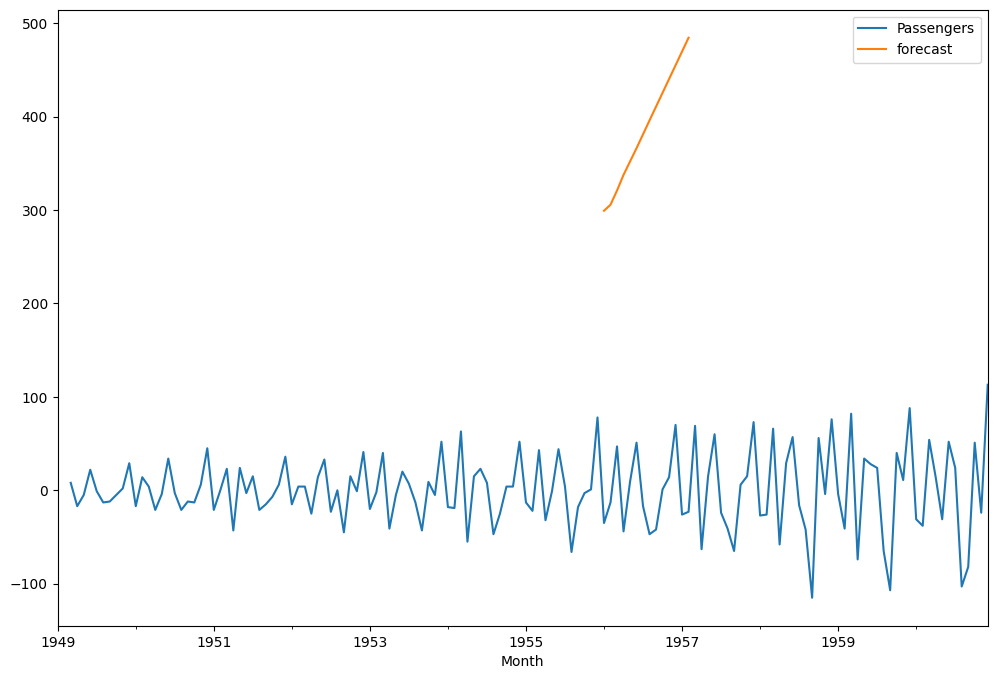

In [45]:

# predicting values for this model
airline_diff2['forecast'] = model_fit.predict(start=84, end=97, dynamic=True)

# plot both actual and forecast
airline_diff2[['Passengers', 'forecast']].plot(figsize=(12,8))


<Axes: xlabel='Month'>

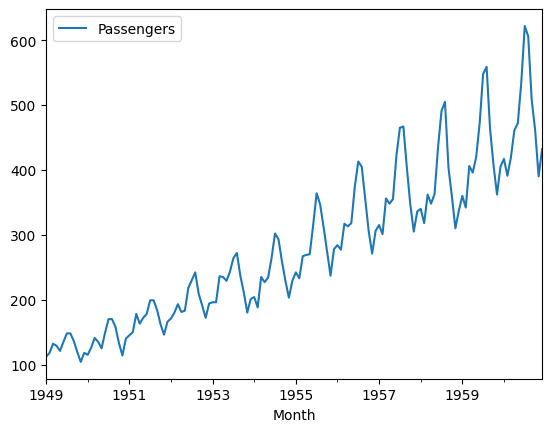

In [46]:
data.plot()

<Axes: xlabel='Month'>

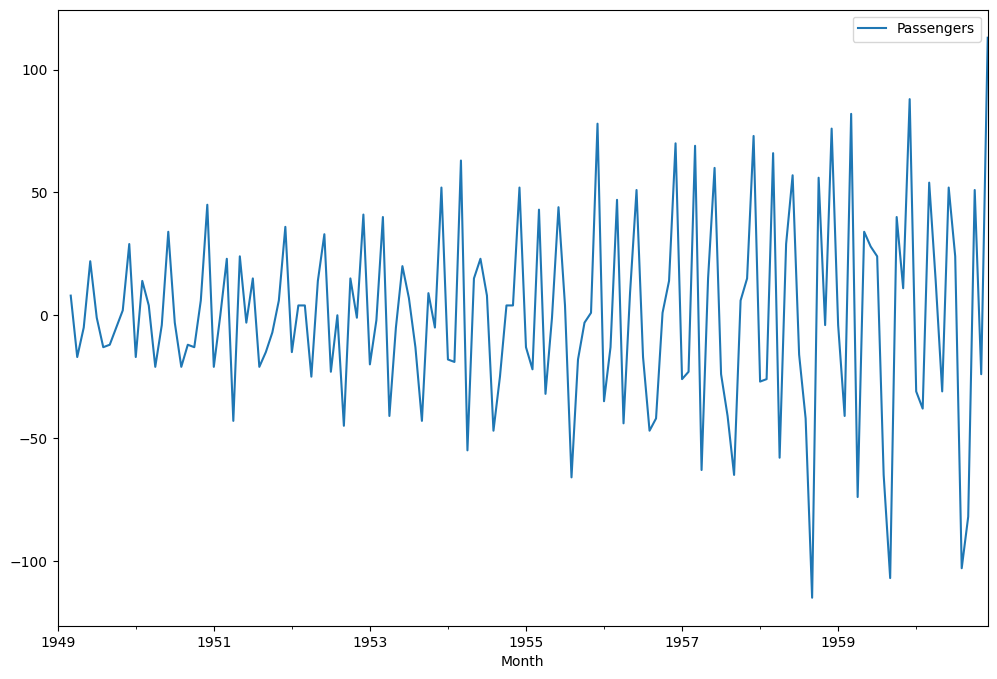

In [47]:
airline_diff2[['Passengers']].plot(figsize=(12,8))#stationarized data

<Axes: xlabel='Month'>

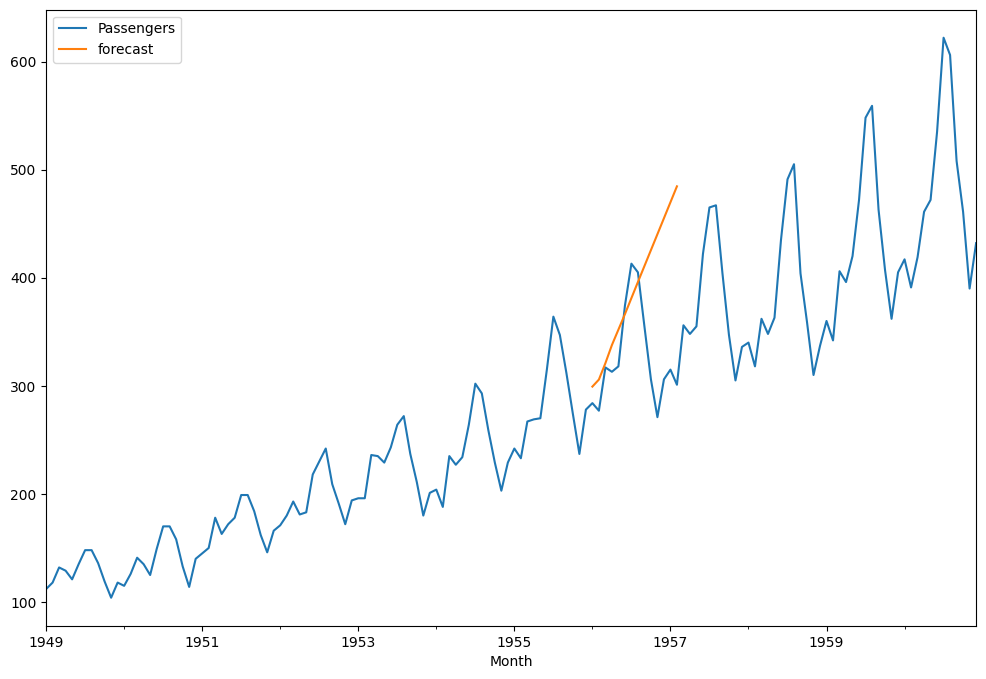

In [48]:

# predicting values for original data
data['forecast'] = model_fit.predict(start=84, end=97, dynamic=True)

# plot both actual and forecast
data[['Passengers', 'forecast']].plot(figsize=(12,8))


In [ ]:
#forecasting future values
from pandas.tseries.offsets import DateOffset
future_dates = [airline_diff2.index[-1] + DateOffset(months=x) for x in range(0, 24)]
len(future_dates)

In [ ]:
import pandas as pd

In [ ]:
future_dates_df = pd.DataFrame(index=future_dates[1:], columns=airline_diff2.columns)
future_dates_df

In [ ]:
future_df=pd.concat([airline_diff2,future_dates_df],axis=0)
future_df.shape

In [ ]:
future_df.tail()

In [ ]:

# predicting values for this model
airline_diff2['forecast'] = model_fit.predict(start=94, end=119, dynamic=True)

# plot both actual and forecast
airline_diff2[['Passengers', 'forecast']].plot(figsize=(12,8))


using SARIMAX TO PREDICT VALUES FOR SEASONAL DATA

In [49]:
#so far we built ARIMA MODEL NOW LETS BUILD SARIMAX MODEL TO PREDICT VALUES
import statsmodels.api as sm


In [50]:
model=sm.tsa.statespace.SARIMAX(data['Passengers'],order=(4,2,0),seasonal_order=(4,2,0,12))
results=model.fit()
#the optimizer didn’t properly converge.”

In [51]:
model = sm.tsa.statespace.SARIMAX(
    data['Passengers'],
    order=(4,2,0),          # non-seasonal (p,d,q)
    seasonal_order=(4,2,0, 12)  # seasonal (P,D,Q,s)
)
results = model.fit()
print(results.summary())
#d=1 and D=1 are usually enough. Your (0,2,4) + (0,2,4,12) is very heavy differencing and high MA order, which often causes convergence problems.

                                     SARIMAX Results                                      
Dep. Variable:                         Passengers   No. Observations:                  144
Model:             SARIMAX(4, 2, 0)x(4, 2, 0, 12)   Log Likelihood                -481.251
Date:                            Tue, 09 Dec 2025   AIC                            980.502
Time:                                    01:46:27   BIC                           1005.438
Sample:                                01-01-1949   HQIC                           990.627
                                     - 12-01-1960                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.1349      0.091    -12.517      0.000      -1.313      -0.957
ar.L2         -0.8545      0.121   

<Axes: xlabel='Month'>

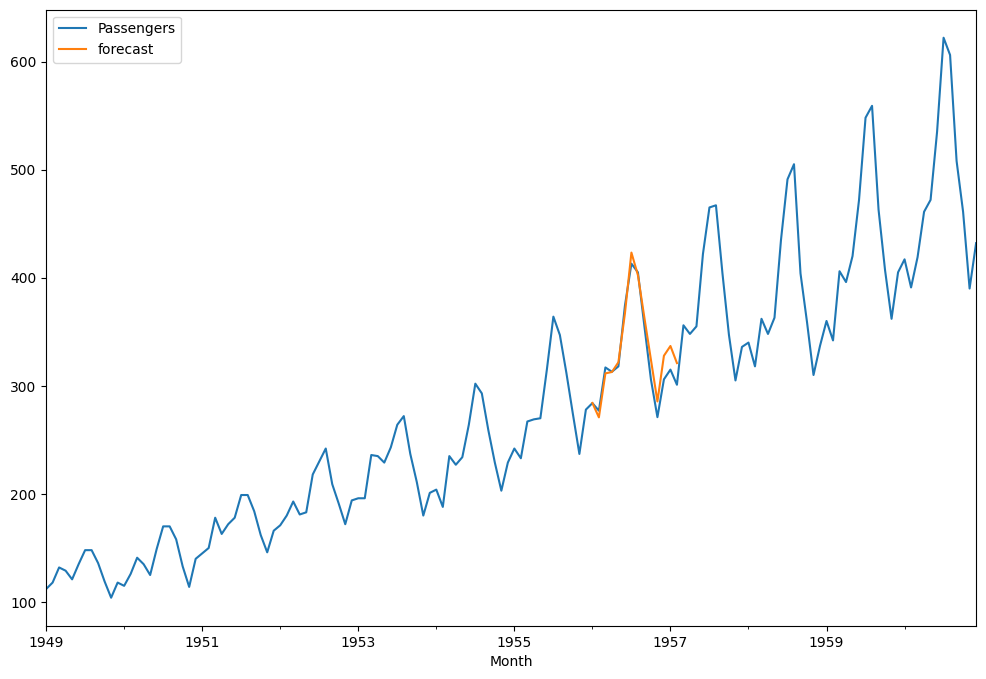

In [52]:
data['forecast']=results.predict(start=84,end=97,dynamic=True)
data[['Passengers','forecast']].plot(figsize=(12, 8))


NOW IT PREDICTED CORRECT FOR SEASONAL COMPONENT

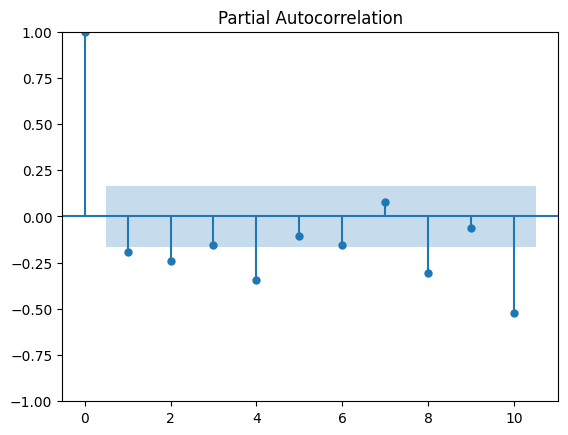

In [53]:
#acf and pcf plots auto correlation and partial auto correlation plots
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_pacf(airline_diff2['Passengers'].dropna(),lags=10)
plt.show()

In [54]:
#SARIMAX FORECAST VALUES IS VERY SIMILAR TO ACTUAL VALUES
#forecasting future values
from pandas.tseries.offsets import DateOffset
future_dates = [airline_diff2.index[-1] + DateOffset(months=x) for x in range(0, 24)]
len(future_dates)

24

In [55]:
future_dates_df = pd.DataFrame(index=future_dates[1:], columns=data.columns)
future_dates_df

,Passengers,forecast
1961-01-01,NaN,NaN
1961-02-01,NaN,NaN
1961-03-01,NaN,NaN
1961-04-01,NaN,NaN
1961-05-01,NaN,NaN
1961-06-01,NaN,NaN
1961-07-01,NaN,NaN
1961-08-01,NaN,NaN
1961-09-01,NaN,NaN
1961-10-01,NaN,NaN


In [56]:
future_df=pd.concat([data,future_dates_df],axis=0)
future_df.shape  
#concatenated and predicted with non stationary data

(167, 2)

In [57]:
future_df.tail()

,Passengers,forecast
1962-07-01,NaN,NaN
1962-08-01,NaN,NaN
1962-09-01,NaN,NaN
1962-10-01,NaN,NaN
1962-11-01,NaN,NaN


<Axes: >

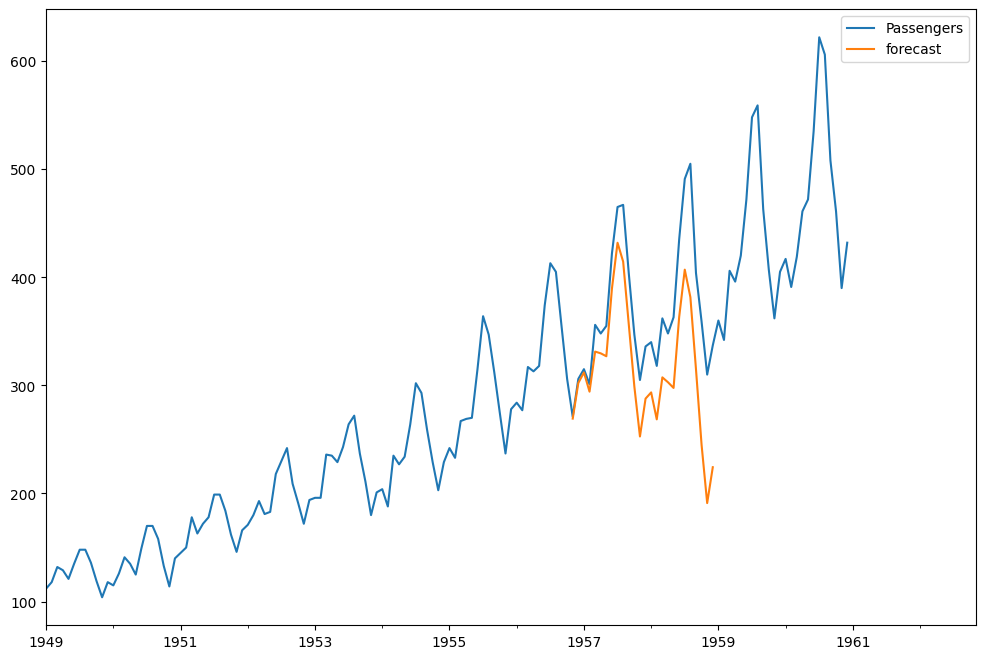

In [58]:
future_df['forecast']=results.predict(start=94,end=119,dynamic=True)
future_df[['Passengers','forecast']].plot(figsize=(12, 8))


even with original data with seasonal component SARIMAX model failed to predict or forecast future values correctly even though has low AIC value too

In [59]:
#forecasted values of future values


In [60]:
future_df['forecast'].iloc[96:]

1957-01-01    311.960702
1957-02-01    294.196309
1957-03-01    331.249440
1957-04-01    329.640895
1957-05-01    326.952894
                 ...    
1962-07-01           NaN
1962-08-01           NaN
1962-09-01           NaN
1962-10-01           NaN
1962-11-01           NaN
Name: forecast, Length: 71, dtype: float64

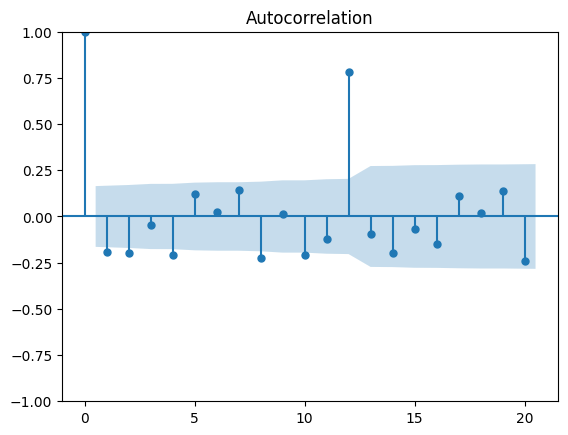

In [61]:
#ARIMA MODEL
#SINCE NOW BUILDING ARIMA MODEL FIND BOTH P AND Q VALUE AND D VALUE IS CONSTANT FIND VALUES FROM ACF AND PACF PLOTS 
#IMPORT DATA ,CHECK STATIONARY AND REGULAR DIFFERENCE IT TWO TIMES THEN DATA BECOME STATIONARY AND ITS READY NOW
#acf and pcf plots auto correlation and partial auto correlation plots
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(airline_diff2['Passengers'].dropna(),lags=20)
plt.show()

In [62]:
#SO Q VALUE IS 2

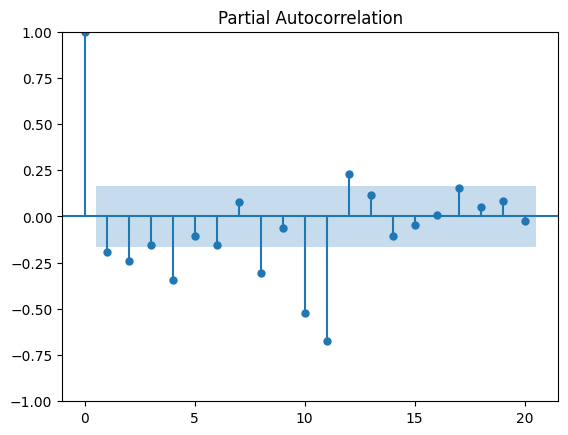

In [63]:
plot_pacf(airline_diff2['Passengers'].dropna(),lags=20)
plt.show()

In [64]:
#so p value is taken as 2

In [67]:
from statsmodels.tsa.arima.model import ARIMA 

In [68]:
model = ARIMA(data['Passengers'], order=(2,2,2))
model_fit=model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                  144
Model:                 ARIMA(2, 2, 2)   Log Likelihood                -691.328
Date:                Tue, 09 Dec 2025   AIC                           1392.657
Time:                        02:18:50   BIC                           1407.436
Sample:                    01-01-1949   HQIC                          1398.663
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4633      0.122     -3.785      0.000      -0.703      -0.223
ar.L2          0.1066      0.116      0.918      0.359      -0.121       0.334
ma.L1         -0.1056     18.140     -0.006      0.9

In [69]:
model_fit.aic

1392.6568884665144

In [70]:
#lets fix p(AR) and d values as constant and give diff values for q i.e MA

In [71]:
p=2
d=2
q=0

In [75]:
pdq = []
aic = []

p=2
d=2
q=0

for q in range(1, 6):
    try:
        model = ARIMA(data['Passengers'], order=(p,d,q)).fit()
        pdq.append((p, d, q))
        aic.append(model.aic)
    except:
        pass

keys = pdq
values = aic
d = dict(zip(keys, values))
print(d)


C:\Users\Srividya\Anaconda3\envs\chatbotenv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Srividya\Anaconda3\envs\chatbotenv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


{(2, 2, 1): 1393.8865727225825, (2, 2, 2): 1392.6568884665144, (2, 2, 3): 1394.4297998595198, (2, 2, 4): 1371.2398427549797, (2, 2, 5): 1363.9868255344609}


C:\Users\Srividya\Anaconda3\envs\chatbotenv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [77]:
#2,2,5 is the order gives least value of AIC as 1363 

That message is still the same convergence warning as before — it’s coming from model.fit(), not from your code structure.

So two key points:

Your code is running.
The model did fit, but the optimizer didn’t fully converge → parameters / AIC may be unreliable.

You’re likely seeing it many times because you’re looping over ARIMA orders (p,d,q), and some of those combinations are hard to fit.

Let’s make this practical.

2. Reduce model complexity

Huge / over-differenced models often fail to converge. For airline-like monthly data, try smaller orders:

In [76]:
model = ARIMA(data['Passengers'], order=(0, 1, 1))
res = model.fit()
print(res.summary())


                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                  144
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -696.629
Date:                Tue, 09 Dec 2025   AIC                           1397.258
Time:                        02:36:23   BIC                           1403.183
Sample:                    01-01-1949   HQIC                          1399.665
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.4027      0.077      5.252      0.000       0.252       0.553
sigma2       996.0870    108.453      9.184      0.000     783.522    1208.652
Ljung-Box (L1) (Q):                   0.07   Jarque-

In [78]:
#build model with least aic value
model = ARIMA(data['Passengers'], order=(2, 2, 5))
res = model.fit()
print(res.summary())

                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                  144
Model:                 ARIMA(2, 2, 5)   Log Likelihood                -673.993
Date:                Tue, 09 Dec 2025   AIC                           1363.987
Time:                        02:39:19   BIC                           1387.633
Sample:                    01-01-1949   HQIC                          1373.596
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3294      0.097     -3.403      0.001      -0.519      -0.140
ar.L2         -0.2689      0.083     -3.236      0.001      -0.432      -0.106
ma.L1         -0.5536      0.103     -5.392      0.0

C:\Users\Srividya\Anaconda3\envs\chatbotenv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [79]:
res.aic

1363.9868255344609

In [80]:
data.size

288

<Axes: xlabel='Month'>

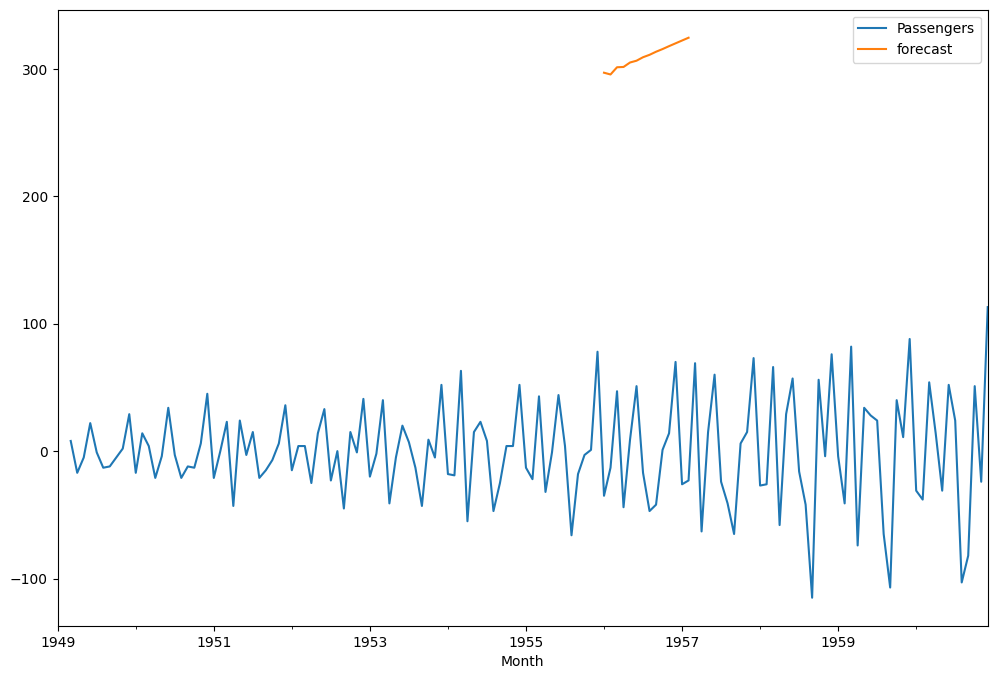

In [81]:
# predicting values for this model
airline_diff2['forecast'] = model_fit.predict(start=84, end=97, dynamic=True)

# plot both actual and forecast
airline_diff2[['Passengers', 'forecast']].plot(figsize=(12,8))
#since its stationarized so it predicts wrong value since becoz of seasonality

In [82]:
#using SARIMAX TO PREDICT VALUES FOR SEASONAL DATA
model=sm.tsa.statespace.SARIMAX(data['Passengers'],order=(2,2,5),seasonal_order=(2,2,5,12))
results=model.fit()
#the optimizer didn’t properly converge.”

C:\Users\Srividya\Anaconda3\envs\chatbotenv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [83]:
model = sm.tsa.statespace.SARIMAX(
    data['Passengers'],
    order=(2,2,5),          # non-seasonal (p,d,q)
    seasonal_order=(2,2,5, 12)  # seasonal (P,D,Q,s)
)
results = model.fit()
print(results.summary())
#d=1 and D=1 are usually enough. Your (0,2,4) + (0,2,4,12) is very heavy differencing and high MA order, which often causes convergence problems.

C:\Users\Srividya\Anaconda3\envs\chatbotenv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                         Passengers   No. Observations:                  144
Model:             SARIMAX(2, 2, 5)x(2, 2, 5, 12)   Log Likelihood                -463.127
Date:                            Tue, 09 Dec 2025   AIC                            956.253
Time:                                    02:51:47   BIC                            997.813
Sample:                                01-01-1949   HQIC                           973.128
                                     - 12-01-1960                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9630      0.765     -1.259      0.208      -2.462       0.536
ar.L2         -0.0964      0.680   

<Axes: xlabel='Month'>

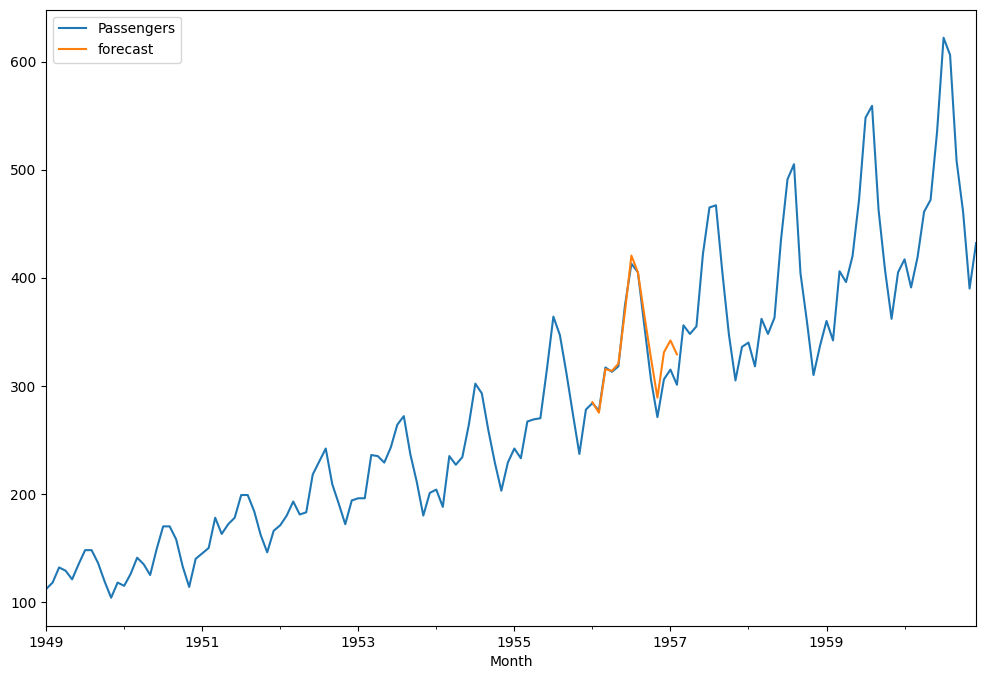

In [84]:
data['forecast']=results.predict(start=84,end=97,dynamic=True)
data[['Passengers','forecast']].plot(figsize=(12, 8))


In [85]:
#forecasted value is similar to actual values hence model is good
#forecasting the future values
from pandas.tseries.offsets import DateOffset
future_dates = [airline_diff2.index[-1] + DateOffset(months=x) for x in range(0, 24)]
len(future_dates)

24

In [86]:
future_dates_df = pd.DataFrame(index=future_dates[1:], columns=data.columns)
future_dates_df

,Passengers,forecast
1961-01-01,NaN,NaN
1961-02-01,NaN,NaN
1961-03-01,NaN,NaN
1961-04-01,NaN,NaN
1961-05-01,NaN,NaN
1961-06-01,NaN,NaN
1961-07-01,NaN,NaN
1961-08-01,NaN,NaN
1961-09-01,NaN,NaN
1961-10-01,NaN,NaN


In [87]:
future_df=pd.concat([data,future_dates_df],axis=0)
future_df.shape  
#concatenated and predicted with original seasonal component  data

(167, 2)

<Axes: >

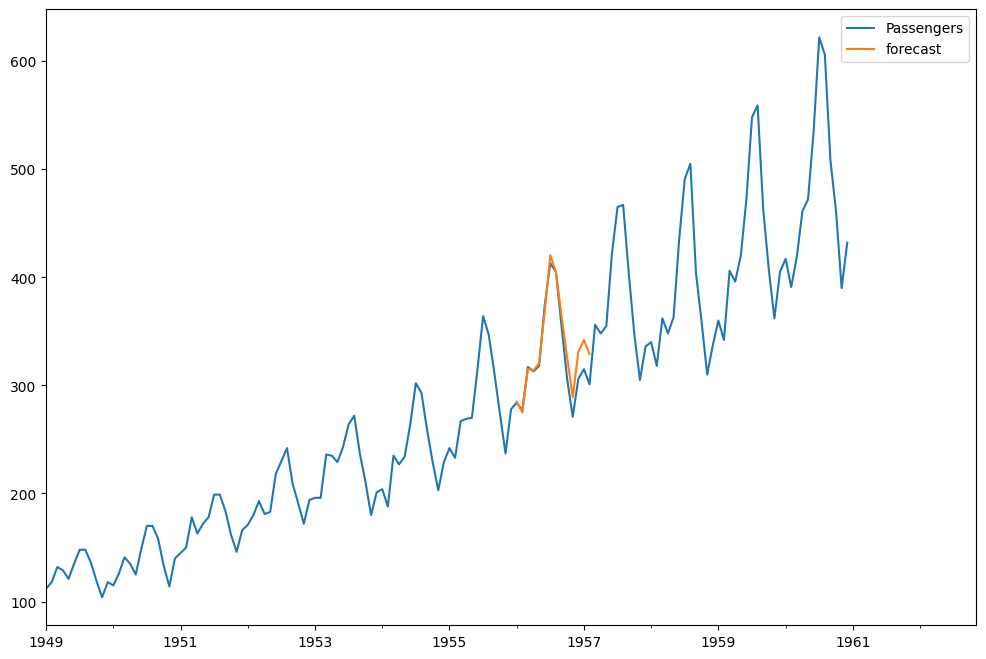

In [88]:
future_df['forecast']=results.predict(start=84,end=97,dynamic=True)
future_df[['Passengers','forecast']].plot(figsize=(12, 8))

In [89]:
#forecasted value correctly follows trend and seasonality in original data
#forecasted values of future years
future_df['forecast'].iloc[96:]

1957-01-01    341.976953
1957-02-01    329.115105
1957-03-01           NaN
1957-04-01           NaN
1957-05-01           NaN
                 ...    
1962-07-01           NaN
1962-08-01           NaN
1962-09-01           NaN
1962-10-01           NaN
1962-11-01           NaN
Name: forecast, Length: 71, dtype: float64

In [90]:
#so implement AR,MA AND ARIMA AND SARIMAX  all models and whichever model gives less aic value choose that model